In [5]:
import multimodal_cci as mmcci
import scanpy as sc
import numpy as np
import pandas as pd

#### Load CellPhoneDB data objects

In [2]:
sample1 = mmcci.tl.read_cellphone_db("/QRISdata/Q1851/Onkar/test_cellphoneDB/v5.0.0/results/statistical_analysis_means_01_05_2024_175530.txt")
sample2 = mmcci.tl.read_cellphone_db("/QRISdata/Q1851/Onkar/test_cellphoneDB/v5.0.0/results/statistical_analysis_interaction_scores_01_05_2024_175530.txt")

#### Calculate overall interactions network per group

In [10]:
sample1_overall = mmcci.it.calculate_overall_interactions(sample1)
sample2_overall = mmcci.it.calculate_overall_interactions(sample2)

#### Rank LR pairs based on dissimilarity between groups

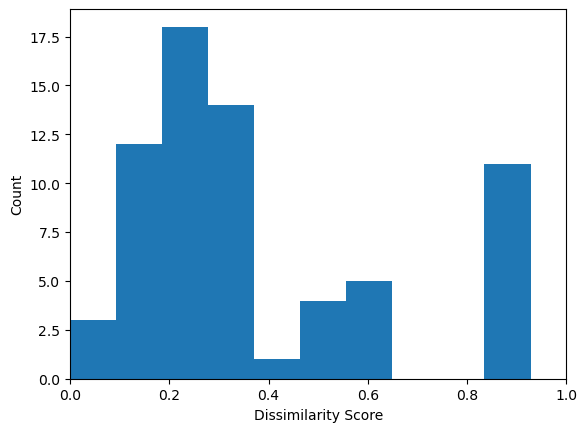

Overall Network Aged vs Young Dissimilarity Score is: 0.5442885772161223

Top 10 Dissimilar LR Pairs: ['APP_TREM2_receptor', 'APP_SORL1', 'CD44_TYROBP', 'PLAUR_integrin_a4b1_complex', 'ICAM1_integrin_aLb2_complex', 'ICAM1_ITGAL', 'ICAM1_integrin_aMb2_complex', 'SELPLG_SELL', 'F10_integrin_aMb2_complex', 'C3_integrin_aMb2_complex']


In [11]:
dissimilarity_scores = mmcci.it.calculate_dissim(sample1, sample2)
mmcci.plt.dissim_hist(dissimilarity_scores)
    
## Sort LR Pairs from high to low dissimilarities
print("Overall Network Aged vs Young Dissimilarity Score is: " + str(mmcci.sc.dissimilarity_score(sample1_overall, sample2_overall)))

sorted_pairs = sorted(dissimilarity_scores, key=dissimilarity_scores.get, reverse=True)
print("\nTop 10 Dissimilar LR Pairs:", sorted_pairs[:10])

#### Plot highly dissimilar pairs between groups

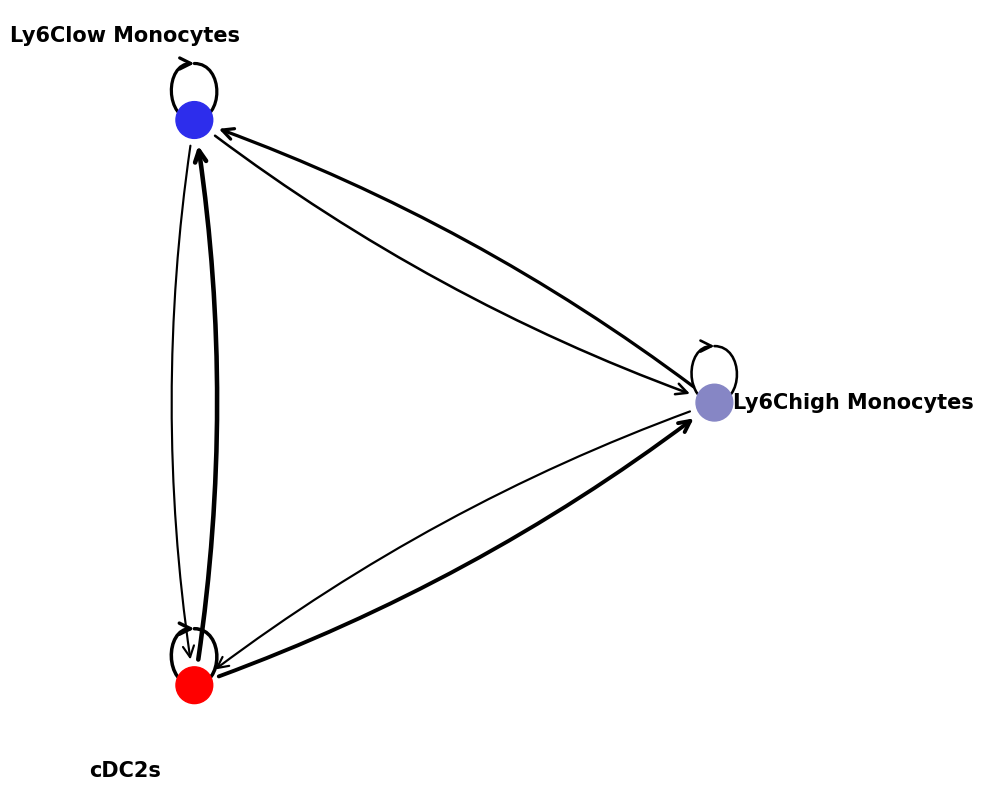

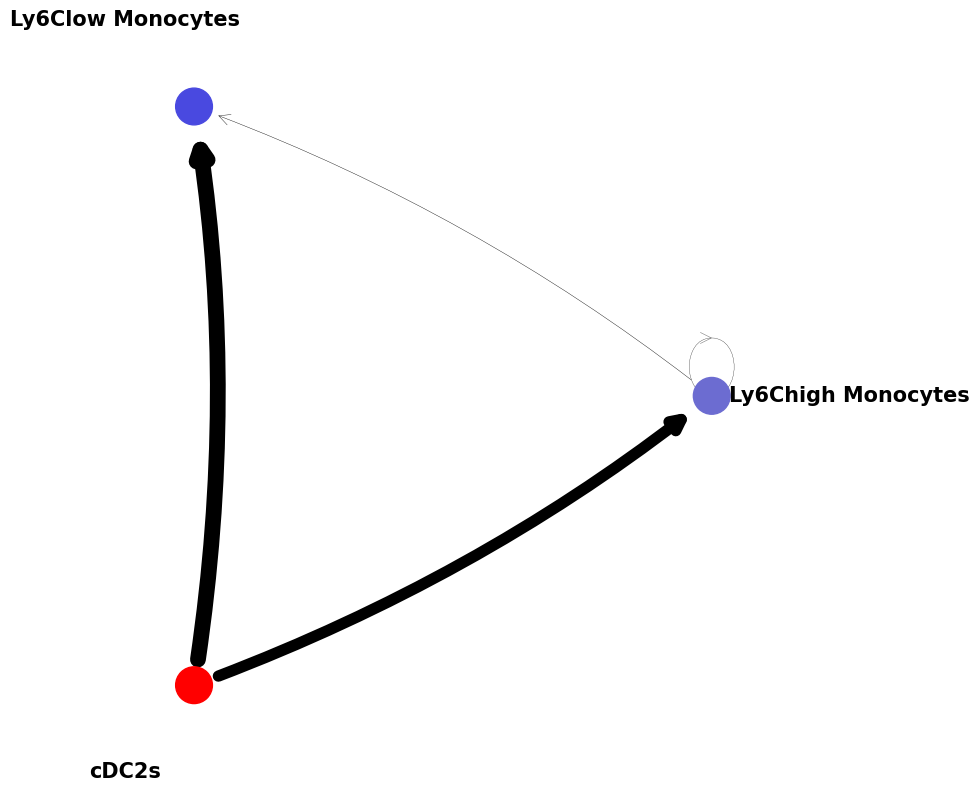

In [39]:
mmcci.plt.network_plot(sample1['APP_TREM2_receptor'])
mmcci.plt.network_plot(sample2['APP_TREM2_receptor'])

#### Calculate p values for significance changes between groups

In [40]:
p_values = mmcci.sc.perm_test(sample1_overall, sample2_overall)
p_values

,Ly6Chigh Monocytes,Ly6Clow Monocytes,cDC2s
Ly6Chigh Monocytes,0.722400,0.278510,0.611380
Ly6Clow Monocytes,0.943280,0.834560,0.332485
cDC2s,0.332925,0.278495,0.165620


#### Plot aged and young overall networks

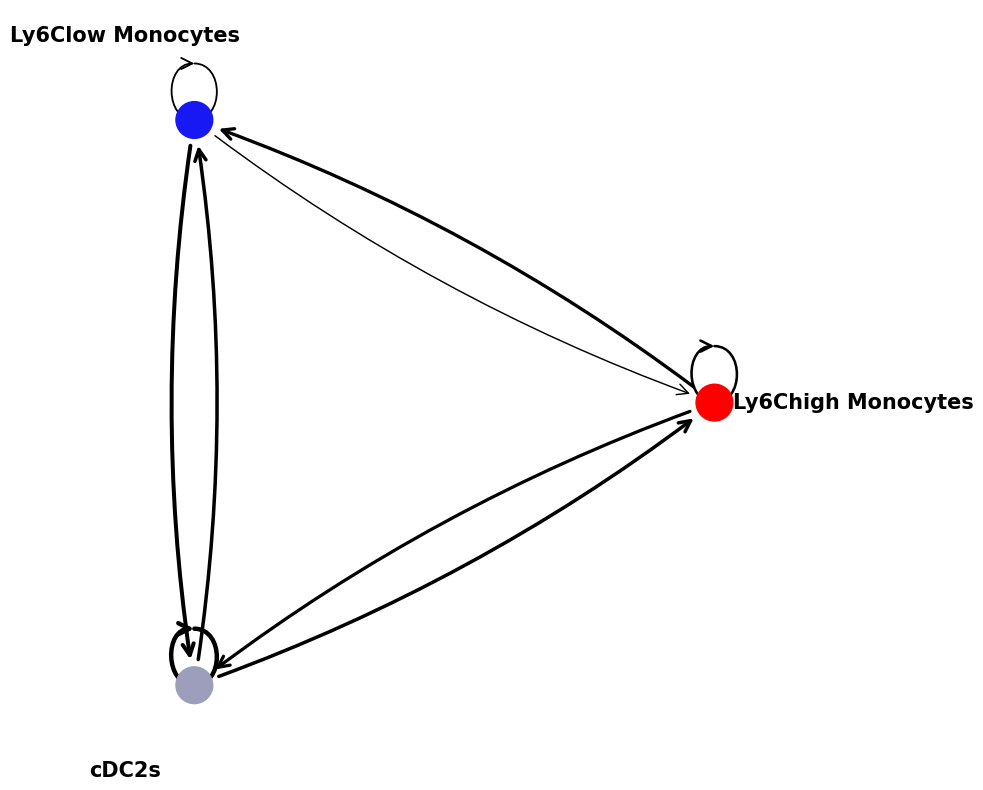

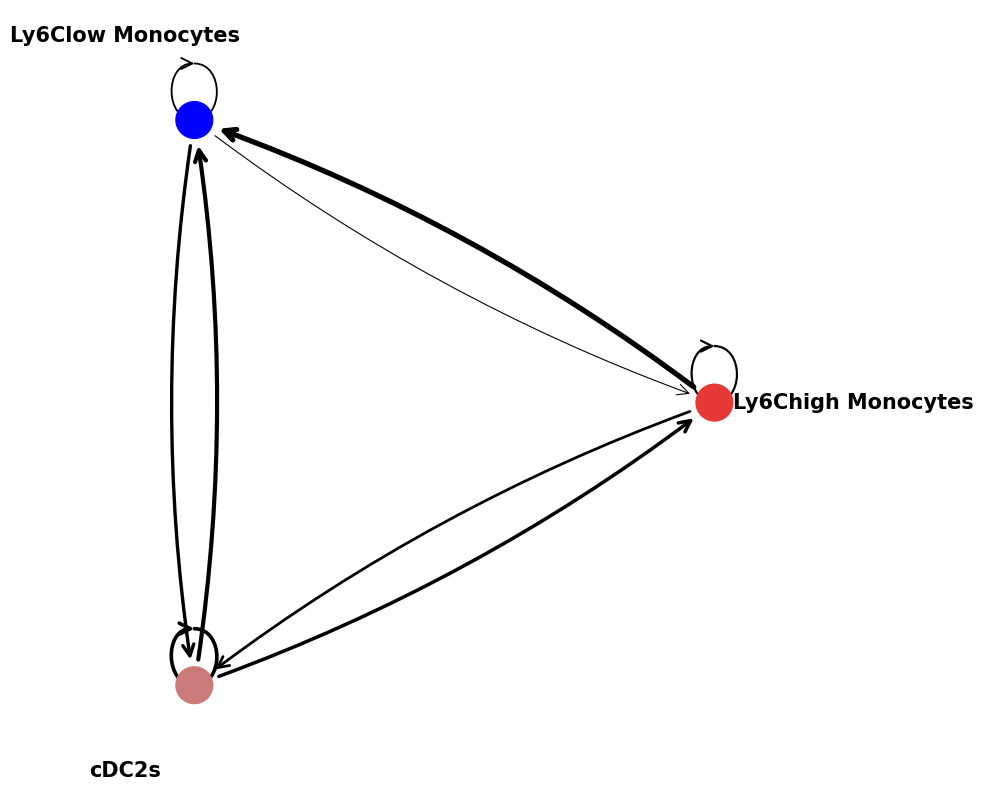

In [41]:
mmcci.plt.network_plot(sample1_overall, p_values)
mmcci.plt.network_plot(sample2_overall, p_values)

#### Cluster aged and young lr pairs

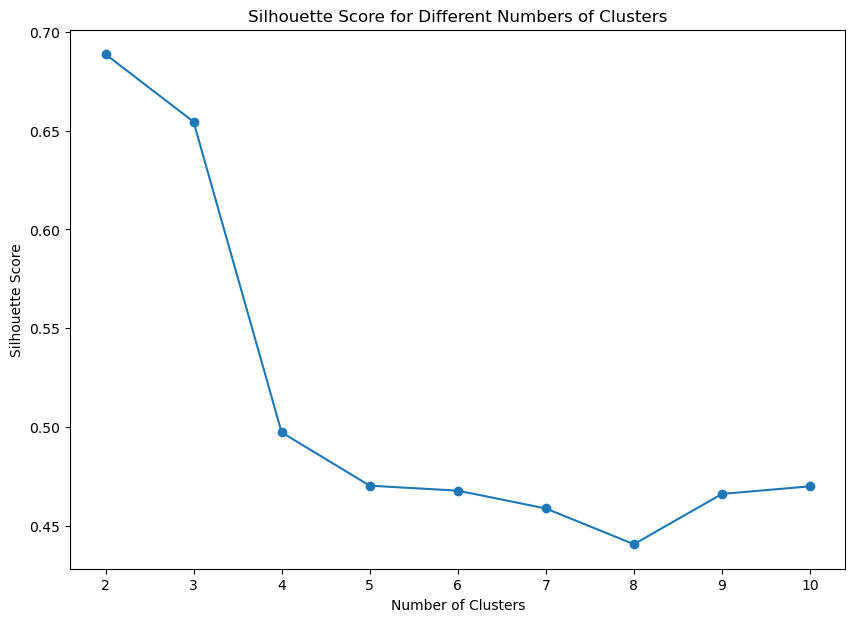

,Cluster
ICAM1_integrin_aMb2_complex,0
F10_integrin_aMb2_complex,0
C3_integrin_aMb2_complex,0
THY1_integrin_aMb2_complex,1
ICAM1_integrin_aXb2_complex,1
...,...
CD47_SIRB1_complex,0
KLRB1_CLEC2D,1
PECAM1_CD38,1
SPN_SIGLEC1,1


In [42]:
sample1_clusters = mmcci.it.lr_clustering(sample1, n_clusters=0)
sample1_clusters

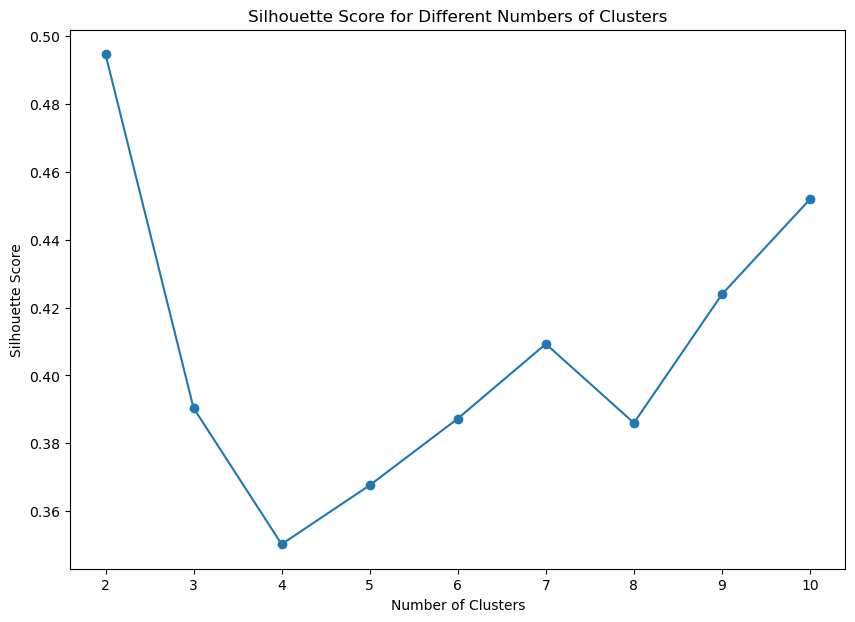

,Cluster
ICAM1_integrin_aMb2_complex,1
F10_integrin_aMb2_complex,1
C3_integrin_aMb2_complex,1
THY1_integrin_aMb2_complex,0
ICAM1_integrin_aXb2_complex,0
...,...
CD47_SIRB1_complex,1
KLRB1_CLEC2D,0
PECAM1_CD38,0
SPN_SIGLEC1,0


In [43]:
sample2_clusters = mmcci.it.lr_clustering(sample2, n_clusters=0)
sample2_clusters